In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
import folium
from pylab import rcParams
from IPython.display import display
%matplotlib inline

In [2]:
voilent_df = pd.read_csv("2_Violent_Conflict_data/VIolent conflict 2010_2019 with coordinates.csv")

In [3]:
voilent_df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,5663002,706,SOM29138,29138,27 July 2019,2019,1,Battles,Armed clash,Al Shabaab,...,Balad,2.3500,45.3833,1,Twitter,Other,27 July. Clashes occurred in Balad between AMI...,0,1564426183,SOM
1,5663003,706,SOM29139,29139,27 July 2019,2019,1,Battles,Armed clash,Military Forces of Somaliland (2010-),...,Karin Biyood,10.1499,46.1049,1,Twitter,Other,27 July. At least two soldiers were killed whe...,2,1564426183,SOM
2,5663004,706,SOM29140,29140,27 July 2019,2019,1,Violence against civilians,Attack,Al Shabaab,...,Saakow,1.6394,42.4522,1,Twitter,Other,27 July. Al Shabaab militants executed a man t...,1,1564426183,SOM
3,5662998,706,SOM29134,29134,26 July 2019,2019,1,Battles,Armed clash,Military Forces of Somalia (2017-) National In...,...,Marka,1.7131,44.7639,1,Shabelle Media Network,Subnational,26 July. Military soldiers clashed with forces...,10,1564426183,SOM
4,5662999,706,SOM29135,29135,26 July 2019,2019,1,Violence against civilians,Attack,Military Forces of Kenya (2013-),...,El Wak,2.7352,41.0177,3,Shabelle Media Network,Subnational,26 July. A truck driver heading from Somalia t...,0,1564426183,SOM


In [4]:
voilent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20488 entries, 0 to 20487
Data columns (total 31 columns):
data_id             20488 non-null int64
iso                 20488 non-null int64
event_id_cnty       20488 non-null object
event_id_no_cnty    20488 non-null int64
event_date          20488 non-null object
year                20488 non-null int64
time_precision      20488 non-null int64
event_type          20488 non-null object
sub_event_type      20488 non-null object
actor1              20488 non-null object
assoc_actor_1       1653 non-null object
inter1              20488 non-null int64
actor2              20284 non-null object
assoc_actor_2       3141 non-null object
inter2              20488 non-null int64
interaction         20488 non-null int64
region              20488 non-null object
country             20488 non-null object
admin1              20488 non-null object
admin2              20488 non-null object
admin3              1 non-null object
location            204

- There are total 31 columns
- Only assoc_actor_1 and admin3 columns has null values.
- We don't require those columns for our analysis so lets ignore it.

In [5]:
voilent_df.duplicated().sum()

0

- So there are no duplicate entries and dataset is pretty clean.

In [6]:
voilent_df.region.value_counts()

Eastern Africa    20488
Name: region, dtype: int64

In [7]:
voilent_df.country.value_counts()

Somalia    20488
Name: country, dtype: int64

- So the data belongs to Eastern Africa of Somalia Country.

In [8]:
somalia_shp_df = gpd.read_file('SOM_adm/SOM_adm1.shp')

In [9]:
somalia_shp_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,210,SOM,Somalia,1,Awdal,Gobolka,Region,None,Adal | Adel,(POLYGON ((43.46125030517607 11.35402774810791...
1,210,SOM,Somalia,2,Bakool,Gobolka,Region,None,None,"POLYGON ((44.75000000000006 4.070000171661434,..."
2,210,SOM,Somalia,3,Banaadir,Gobolka,Region,None,Benadir,"POLYGON ((45.44235992431646 2.08708310127264, ..."
3,210,SOM,Somalia,4,Bari,Gobolka,Region,None,None,(POLYGON ((51.18291854858393 10.55986118316656...
4,210,SOM,Somalia,5,Bay,Gobolka,Region,None,Baay,"POLYGON ((44.31000137329119 3.570000886917114,..."


In [11]:
somalia_shp_df.NAME_1.unique().shape

(18,)

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
events_encoded = labelencoder.fit_transform(voilent_df.event_type)

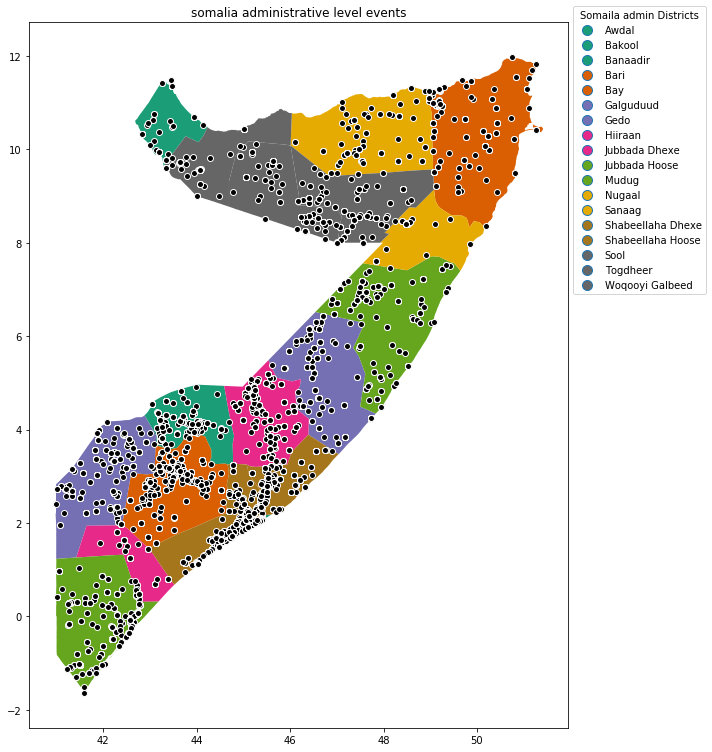

In [172]:
# Set legend style
lgnd_kwds = {'title': 'Somaila admin Districts',
               'loc': 'upper left', 'bbox_to_anchor': (1, 1.03), 'ncol': 1}
rcParams['figure.figsize'] = 10, 18
somalia_shp_df.plot(column='NAME_1', cmap='Dark2', legend=True, legend_kwds = lgnd_kwds)#, fig_size=(10,10));
plt.scatter(x=voilent_df.longitude, y=voilent_df.latitude, c='black', edgecolor='white')
#plt.legend(voilent_df.event_type.unique());
#plt.legend(voilent_df.event_type.unique())
plt.tight_layout()
plt.title('somalia administrative level events')
plt.show()

In [15]:
voilent_df.event_type.unique()

array(['Battles', 'Violence against civilians',
       'Explosions/Remote violence', 'Riots'], dtype=object)

In [17]:
Battle_df = voilent_df[voilent_df.event_type == 'Battles']
Violence_df = voilent_df[voilent_df.event_type == 'Violence against civilians']
Explosions_df = voilent_df[voilent_df.event_type == 'Explosions/Remote violence']
Riots_df =  voilent_df[voilent_df.event_type == 'Riots']

### Lets plot the eventts in the folium map for better data visualization.

In [40]:
m = folium.Map(location=[5.1521, 46.1996])

In [41]:
voilent_gdf = gpd.GeoDataFrame(
    voilent_df, geometry=[Point(x, y) for x, y in zip(voilent_df.longitude, voilent_df.latitude)])

In [42]:
voilent_gdf.head(1)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,geometry
0,5663002,706,SOM29138,29138,27 July 2019,2019,1,Battles,Armed clash,Al Shabaab,...,2.35,45.3833,1,Twitter,Other,27 July. Clashes occurred in Balad between AMI...,0,1564426183,SOM,POINT (45.3833 2.35)


In [46]:
voil_admin1_names = voilent_gdf.admin1.unique()
shap_admin1_names = somalia_shp_df.NAME_1.unique()

In [47]:
# mapping somali admin names to english names
somali_adm_names_dict = {'Jubbada Hoose' : 'Lower Juba',
                         'Shabeellaha Hoose' : 'Lower Shabelle',
                         'Jubbada Dhexe' : 'Middle Juba', 
                         'Shabeellaha Dhexe' : 'Middle Shabelle',
                         'Banaadir' : 'Banadir',
                         'Hiiraan' : 'Hiraan',
                         'Galguduud': 'Galgaduud'}

'Lower Juba' and 'Jubbada Hoose' both are same.
'Lower Shabelle' and 'Shabeellaha Hoose' are same
'Middle Juba' and 'Jubbada Dhexe' are same.
'Middle Shabelle' and Shabeellaha Dhexe are same.

In [63]:
'''new_shap_admin1_names = shap_admin1_names.copy()
for ind, x in enumerate(shap_admin1_names):
    if x in somali_adm_names_dict:
        new_shap_admin1_names[ind] = somali_adm_names_dict[x]
new_shap_admin1_names.sort()'''

'new_shap_admin1_names = shap_admin1_names.copy()\nfor ind, x in enumerate(shap_admin1_names):\n    if x in somali_adm_names_dict:\n        new_shap_admin1_names[ind] = somali_adm_names_dict[x]\nnew_shap_admin1_names.sort()'

In [64]:
english_admin_1_names = []
for x in somalia_shp_df.NAME_1:
    if x in somali_adm_names_dict:
        english_admin_1_names.append(somali_adm_names_dict[x])
    else:
        english_admin_1_names.append(x)

In [65]:
somalia_shp_df['english_admin_1_names'] = english_admin_1_names

In [68]:
'''for row in voilent_gdf.iterrows():
    row_values = row[1]
    location = [row_values['latitude'], row_values['longitude']] 
    marker = folium.Marker(location=location)
    marker.add_to(m)'''

"for row in voilent_gdf.iterrows():\n    row_values = row[1]\n    location = [row_values['latitude'], row_values['longitude']] \n    marker = folium.Marker(location=location)\n    marker.add_to(m)"

In [69]:
somalia_shp_df.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,english_admin_1_names
0,210,SOM,Somalia,1,Awdal,Gobolka,Region,None,Adal | Adel,(POLYGON ((43.46125030517607 11.35402774810791...,Awdal
1,210,SOM,Somalia,2,Bakool,Gobolka,Region,None,None,"POLYGON ((44.75000000000006 4.070000171661434,...",Bakool
2,210,SOM,Somalia,3,Banaadir,Gobolka,Region,None,Benadir,"POLYGON ((45.44235992431646 2.08708310127264, ...",Banadir
3,210,SOM,Somalia,4,Bari,Gobolka,Region,None,None,(POLYGON ((51.18291854858393 10.55986118316656...,Bari
4,210,SOM,Somalia,5,Bay,Gobolka,Region,None,Baay,"POLYGON ((44.31000137329119 3.570000886917114,...",Bay


In [70]:
folium.GeoJson(somalia_shp_df.geometry).add_to(m)

In [73]:
m.save("somalia with admin boundaries map.html")

In [82]:
somalia_events_choropleth = voilent_df.groupby('admin1').size()

In [86]:
somalia_events_choropleth = somalia_events_choropleth.reset_index()
somalia_events_choropleth.columns = ['english_admin_1_names', 'number of events']

In [91]:
somalia_shp_df.head(1)

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,english_admin_1_names
0,210,SOM,Somalia,1,Awdal,Gobolka,Region,None,Adal | Adel,(POLYGON ((43.46125030517607 11.35402774810791...,Awdal


In [95]:
admin_with_event_counts = pd.merge(somalia_events_choropleth, somalia_shp_df, on='english_admin_1_names')

In [98]:
admin_with_event_counts = admin_with_event_counts[['english_admin_1_names', 'number of events', 'geometry']]

In [100]:
total_events = admin_with_event_counts['number of events'].sum()

In [ ]:
admin_with_event_counts['number of events']/total_events

In [ ]:
admin_with_event_counts.pl

In [102]:
somalia_events_choropleth.columns

Index(['english_admin_1_names', 'number of events'], dtype='object')

In [121]:
#gdf = 
admin_with_event_counts = gpd.GeoDataFrame(admin_with_event_counts, geometry=admin_with_event_counts.geometry)

In [149]:
m = folium.Map(location=[5.1521, 46.1996], zoom_start=6)

folium.Choropleth(
    geo_data=somalia_shp_df,
    name='geometry',
    data=somalia_events_choropleth,
    columns=['english_admin_1_names', 'number of events'],
    key_on='feature.properties.english_admin_1_names',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='number of events'
).add_to(m)

folium.LayerControl().add_to(m)

In [150]:
admin_with_event_counts['center'] = admin_with_event_counts.geometry.centroid

# Build markers and popups
for row in admin_with_event_counts.iterrows():
    row_values = row[1] 
    center_point = row_values['center']
    location = [center_point.y, center_point.x]
    popup = ('Admin name: ' + str(row_values['english_admin_1_names']) + 
             ';  ' + 'Number of events occured: ' + str(row_values['number of events']))
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(m)

In [151]:
m.save("somalia_events_choloropleth.html")

In [155]:
voilent_gdf.event_type = pd.to_datetime(voilent_gdf.event_date)

In [156]:
voilent_gdf.set_index('event_date', inplace=True)

In [168]:
voilent_gdf[voilent_gdf['admin1']=='Bay'].groupby('event_date').count()

pandas.core.frame.DataFrame

In [ ]:
voilent_gdf.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

In [138]:
admin_with_event_counts.sort_values(by='number of events', ascending=False)

,english_admin_1_names,number of events,geometry,center
2,Banadir,6095,"POLYGON ((45.44235992431646 2.08708310127264, ...",POINT (45.42425127419144 2.109124814653644)
9,Lower Shabelle,3467,(POLYGON ((44.04041671752958 1.107360005378837...,POINT (44.32605649859484 1.903996271726766)
8,Lower Juba,1607,(POLYGON ((41.61375045776362 -1.60791802406311...,POINT (41.80258075226667 0.09213540591720709)
4,Bay,1482,"POLYGON ((44.31000137329119 3.570000886917114,...",POINT (43.56644195092999 2.653014196489809)
7,Hiraan,1207,"POLYGON ((45.70999908447271 5.110001087188721,...",POINT (45.474382686115 4.211939031114867)
6,Gedo,1078,"POLYGON ((42.88999938964872 4.289999961853084,...",POINT (41.97713291324852 2.894831127998259)
3,Bari,916,(POLYGON ((51.18291854858393 10.55986118316656...,POINT (50.04870246210515 10.21982545074754)
12,Mudug,907,"POLYGON ((49.50000000000017 7.570000171661434,...",POINT (48.15114736904502 6.377827039409858)
11,Middle Shabelle,845,"POLYGON ((46.38999938964872 3.890000104904232,...",POINT (46.01033962168832 3.021458441118866)
1,Bakool,636,"POLYGON ((44.75000000000006 4.070000171661434,...",POINT (43.95101432756121 4.208294143315604)


### [Q] What are major voilent event types?

In [10]:
voilent_df.event_type.value_counts()

Battles                       10559
Explosions/Remote violence     4758
Violence against civilians     4742
Riots                           429
Name: event_type, dtype: int64

In [20]:
def value_counts_plot(vc, xlabel='index values', ylabel='counts', title='value_counts_plot'):
    
    plt.figure(figsize=(8,6))
    sns.barplot(vc.keys(), vc.values);
    plt.xticks(rotation=90)
    #plt.yticks(vc.values);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.title(title);
    plt.tight_layout()
    plt.show()

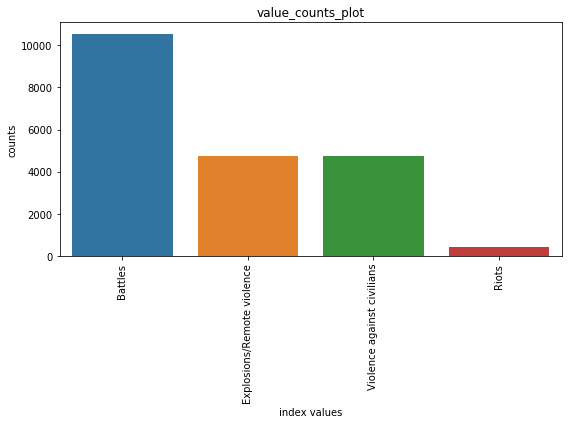

In [21]:
value_counts_plot(vc=voilent_df.event_type.value_counts(), )

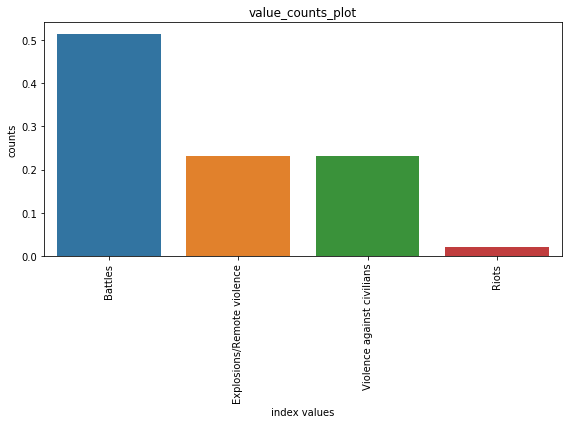

In [23]:
value_counts_plot(vc=voilent_df.event_type.value_counts(normalize=True))

- Nearly 50% events are caused by Battles, 22% dues to explosion and Voilence against civilians and 2% due to Riots. 